# Mini project 1 : Samuel Hurault

## Simple Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mp1 import *
import np_utils
from keras import models
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Reshape, Permute, Activation, BatchNormalization, Dropout , Flatten, MaxPooling2D, Input, Embedding, Dropout, Bidirectional, GRU, TimeDistributed, Dense,UpSampling2D, Conv2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD,Adam

/Users/samuelhurault/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We create the datasets

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


### SGB Optimizer

In [3]:
model = Sequential()

nb_neurons = 20

model = Sequential([
  Dense(nb_neurons, input_shape=(5184,),activation='relu'),
  Dense(3,activation='softmax')])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                103700    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 103,763
Trainable params: 103,763
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['acc'])
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
300/300 [==============================] - 0s 458us/step - loss: 1.8474 - acc: 0.3500
Epoch 2/50
300/300 [==============================] - 0s 73us/step - loss: 1.0770 - acc: 0.3800
Epoch 3/50
300/300 [==============================] - 0s 70us/step - loss: 1.0766 - acc: 0.3533
Epoch 4/50
300/300 [==============================] - 0s 75us/step - loss: 1.0399 - acc: 0.4133
Epoch 5/50
300/300 [==============================] - 0s 69us/step - loss: 1.0162 - acc: 0.4600
Epoch 6/50
300/300 [==============================] - 0s 66us/step - loss: 0.9981 - acc: 0.4667
Epoch 7/50
300/300 [==============================] - 0s 73us/step - loss: 0.9552 - acc: 0.4800
Epoch 8/50
300/300 [==============================] - 0s 66us/step - loss: 0.9377 - acc: 0.5467
Epoch 9/50
300/300 [==============================] - 0s 69us/step - loss: 0.9117 - acc: 0.5567
Epoch 10/50
300/300 [==============================] - 0s 72us/step - loss: 0.8810 - acc: 0.5667
Epoch 11/50
300/300 [=================

In [5]:
X_test = generate_a_rectangle()
X_test=np.reshape(X_test,(1,-1))
res = model.predict(X_test)
a = np.argmax(res)
if (a==0):
    print('correct prediction')
else :
    print('bad prediction')

bad prediction


The network converges. We obtain descent results.

### Adam Optimizer

In [6]:
model = Sequential()

nb_neurons = 20

model = Sequential([
  Dense(nb_neurons, input_shape=(5184,),activation='relu'),
  Dense(3,activation='softmax')])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                103700    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 103,763
Trainable params: 103,763
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 650us/step - loss: 1.3432 - acc: 0.3967
Epoch 2/30
300/300 [==============================] - 0s 100us/step - loss: 0.7424 - acc: 0.6767
Epoch 3/30
300/300 [==============================] - 0s 72us/step - loss: 0.5539 - acc: 0.8000
Epoch 4/30
300/300 [==============================] - 0s 85us/step - loss: 0.4748 - acc: 0.8100
Epoch 5/30
300/300 [==============================] - 0s 78us/step - loss: 0.4230 - acc: 0.8433
Epoch 6/30
300/300 [==============================] - 0s 82us/step - loss: 0.3725 - acc: 0.8267
Epoch 7/30
300/300 [==============================] - 0s 91us/step - loss: 0.3077 - acc: 0.9200
Epoch 8/30
300/300 [==============================] - 0s 79us/step - loss: 0.2578 - acc: 0.9333
Epoch 9/30
300/300 [==============================] - 0s 86us/step - loss: 0.2302 - acc: 0.9500
Epoch 10/30
300/300 [==============================] - 0s 72us/step - loss: 0.2279 - acc: 0.9467
Epoch 11/30
300/300 [================

In [8]:
X_test = generate_a_rectangle()
X_test=np.reshape(X_test,(1,-1))
res = model.predict(X_test)
a = np.argmax(res)
if (a==0):
    print('correct prediction')
else :
    print('bad prediction')

correct prediction


With the adam optimization the convergence is faster and more precise. The finial accuracy is 1 on the training set !

### Visualization of the Solution

We observe the 20 neurons of the previous network

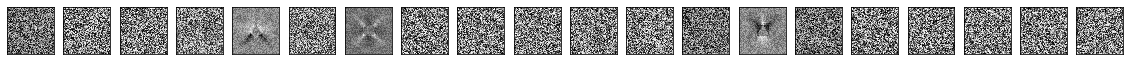

In [10]:
weights = model.get_weights()
n=20
plt.figure(figsize=(20, 4))
for i in range(20):
    ax = plt.subplot(1, n, i+1)
    x = np.reshape(weights[0][:,i],(72,72))
    plt.imshow(x,cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We observe that only 3 neurons seem useful for classification. The other neurons encode noise.

In [11]:
np.argmax(weights[2][:,0])

17

The most important neuron to predict if a shape is a rectangle is the 12th of the previous display.

In [12]:
model = Sequential()

nb_neurons = 5

model = Sequential([
  Dense(nb_neurons, input_shape=(5184,),activation='relu'),
  Dense(3,activation='softmax')])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(X_train, Y_train, epochs=30, batch_size=16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 25925     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 18        
Total params: 25,943
Trainable params: 25,943
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
300/300 [==============================] - 0s 788us/step - loss: 1.6085 - acc: 0.3633
Epoch 2/30
300/300 [==============================] - 0s 112us/step - loss: 1.0988 - acc: 0.3100
Epoch 3/30
300/300 [==============================] - 0s 110us/step - loss: 1.0988 - acc: 0.3100
Epoch 4/30
300/300 [==============================] - 0s 107us/step - loss: 1.0987 - acc: 0.3500
Epoch 5/30
300/300 [==============================] - 0s 108us/step - loss: 1.0986 - acc: 0.3500
Epoch 6/30
300/300 [=============================

## A More Difficult Classification Problem

In [13]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
X_train= np.reshape(X_train,(X_train.shape[0],72, 72, 1))
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


We create the CNN network with this very simple architecture : 

In [14]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu',
          input_shape=(72, 72, 1)))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 

model.add(Dense(3, activation='softmax')) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________


We continue with the Adam optimizer

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=34, epochs=32, verbose=1)

Epoch 1/32
300/300 [==============================] - 1s 3ms/step - loss: 2.1952 - acc: 0.3200
Epoch 2/32
300/300 [==============================] - 1s 2ms/step - loss: 1.1863 - acc: 0.3267
Epoch 3/32
300/300 [==============================] - 1s 2ms/step - loss: 0.9516 - acc: 0.5400
Epoch 4/32
300/300 [==============================] - 1s 2ms/step - loss: 0.8573 - acc: 0.7367
Epoch 5/32
300/300 [==============================] - 1s 2ms/step - loss: 0.7761 - acc: 0.8267
Epoch 6/32
300/300 [==============================] - 1s 2ms/step - loss: 0.7064 - acc: 0.8067
Epoch 7/32
300/300 [==============================] - 1s 2ms/step - loss: 0.6582 - acc: 0.7967
Epoch 8/32
300/300 [==============================] - 1s 2ms/step - loss: 0.6063 - acc: 0.8400
Epoch 9/32
300/300 [==============================] - 1s 2ms/step - loss: 0.5593 - acc: 0.8367
Epoch 10/32
300/300 [==============================] - 1s 2ms/step - loss: 0.5182 - acc: 0.8433
Epoch 11/32
300/300 [============================

In [16]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [17]:
X_test= np.reshape(X_test,(X_test.shape[0],72,72,1))
val = model.evaluate(X_test, Y_test)
print('accuracy on the test set = ', val[1])
print('the loss value on the test set = ', val[0])

300/300 [==============================] - 0s 1ms/step
accuracy on the test set =  0.7399999992052714
the loss value on the test set =  0.6367584931850433


The accuracy on the test set is pretty low compared to the one on the training set. This might be a clue of overfitting. In order to sove that issue, we increase the number of training samples and we add dropout in the architectecture.

In [18]:
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
X_train= np.reshape(X_train,(X_train.shape[0],72, 72, 1))
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [19]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu',
          input_shape=(72, 72, 1)))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 

model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax')) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18496)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=32, epochs=30, verbose=1)

Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0077 - acc: 0.5380A: 2s - lo
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7497 - acc: 0.6970
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6766 - acc: 0.7300
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5827 - acc: 0.7760
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5628 - acc: 0.7910
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5004 - acc: 0.8400
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4469 - acc: 0.8600
Epoch 8/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4170 - acc: 0.8640
Epoch 9/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3746 - acc: 0.8850
Epoch 10/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3438 - acc: 0.8950
Epoch 11/30
1000/10

In [21]:
X_test= np.reshape(X_test,(X_test.shape[0],72,72,1))
val = model.evaluate(X_test, Y_test)
print('accuracy on the test set = ', val[1])

300/300 [==============================] - 0s 1ms/step
accuracy on the test set =  0.8766666658719381


We significantly improved the accuracy.

In [22]:
print('the loss value on the test set = ', val[0])

the loss value on the test set =  0.3551584812005361


## A Regression Problem

We first load the training and testing datasets

In [23]:
[X_train, Y_train] = generate_dataset_regression(10000, 10)
[X_test, Y_test] = generate_test_set_regression()
IMAGE_SIZE=72

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

The first processing to do on the Y values is to order them. We chosse to order them along the x axis. The network then knows which point to predict

[0.0395099  0.2589281  0.47545291 0.94383313 0.93506384 0.50777214]


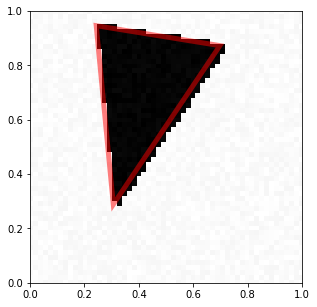

In [25]:
def order(Y):
    x = [Y[0],Y[2],Y[4]]
    points = np.array([[Y[0],Y[1]],[Y[2],Y[3]],[Y[4],Y[5]]])
    order = np.argsort(x)
    sorted_points = points[order]
    return(sorted_points.reshape((6,)))

print(order(Y_train[16]))
visualize_prediction(X_train[17],Y_train[17])

In [26]:
X_train = np.reshape(X_train,(X_train.shape[0],IMAGE_SIZE, IMAGE_SIZE,1))
X_test = np.reshape(X_test,(X_test.shape[0],IMAGE_SIZE, IMAGE_SIZE,1))

We create a CNN model composed of 3 convolutional/Relu/MaxPooling layers and 2 fully connected layers.

In [27]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu',
          input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten()) 

model.add(Dropout(0.4))

model.add(Dense(32, activation='relu')) 

model.add(Dropout(0.2))

model.add(Dense(6, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

We add callbacks

In [28]:
# early-stopping of the mse on the validation data does not decrease
early_stopping = EarlyStopping(monitor='mse', 
                                   patience=2,
                                   mode='min')
    
# save model corresponding to best epoch
checkpointer = ModelCheckpoint(filepath='model', 
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True)


model.fit(X_train,Y_train,batch_size=32, epochs=10, verbose=1,callbacks = [early_stopping,checkpointer],
         validation_data = [X_test[:100],Y_test[:100]])

Train on 10000 samples, validate on 100 samples
Epoch 1/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0881 - val_loss: 0.0615

Epoch 00001: val_loss improved from inf to 0.06154, saving model to model
Epoch 2/10


/Users/samuelhurault/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `mse` which is not available. Available metrics are: val_loss,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10000/10000 [==============================] - 34s 3ms/step - loss: 0.0684 - val_loss: 0.0595

Epoch 00002: val_loss improved from 0.06154 to 0.05950, saving model to model
Epoch 3/10
10000/10000 [==============================] - 34s 3ms/step - loss: 0.0649 - val_loss: 0.0590

Epoch 00003: val_loss improved from 0.05950 to 0.05896, saving model to model
Epoch 4/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0624 - val_loss: 0.0583

Epoch 00004: val_loss improved from 0.05896 to 0.05831, saving model to model
Epoch 5/10
10000/10000 [==============================] - 35s 4ms/step - loss: 0.0611 - val_loss: 0.0582

Epoch 00005: val_loss improved from 0.05831 to 0.05816, saving model to model
Epoch 6/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0605 - val_loss: 0.0578

Epoch 00006: val_loss improved from 0.05816 to 0.05784, saving model to model
Epoch 7/10
10000/10000 [==============================] - 35s 3ms/step - loss: 0.0599 - val

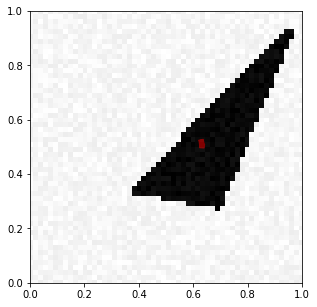

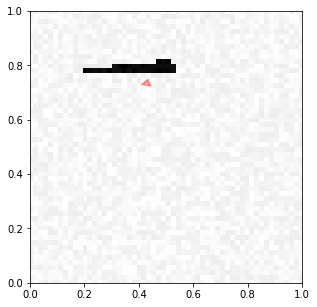

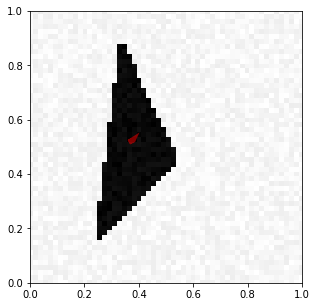

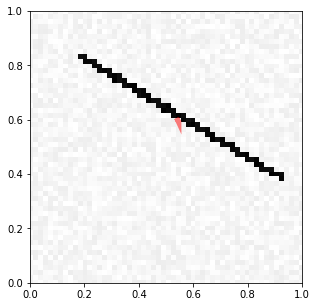

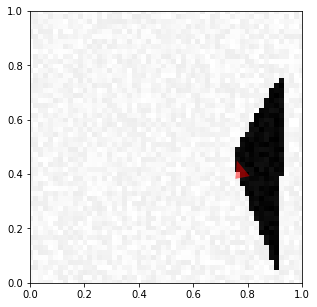

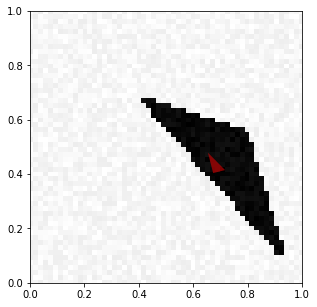

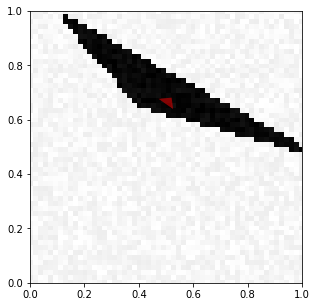

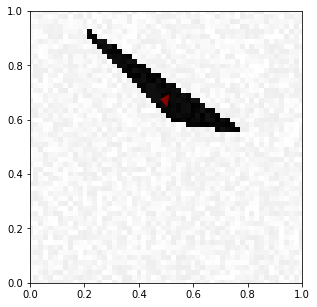

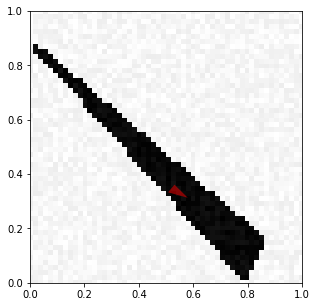

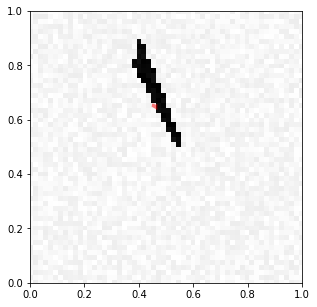

In [31]:
result = model.predict(X_test)
for i in range(10):
    visualize_prediction(X_test[i],result[i])

The network does not converge, despite different tries on the shape and size of the network, I did not succeed to improve the results.

## Image Denoising

We use the cifar10 dataset composed of 50000 natural color images of size $32 \times 32 \times3$. We transform the color images to grayscale, to reduce computational time. In order to denoise color images, we will just have to apply the algorithm to each image layer. 

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mp1 import *
import np_utils
%matplotlib inline
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dropout , Flatten, MaxPooling2D, Input, Embedding, Dropout, Bidirectional, GRU, TimeDistributed, Dense,UpSampling2D, Conv2D
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard

IMAGE_SIZE = 32

In [33]:
from keras.datasets import cifar10
(X_train, _), (X_test, _) = cifar10.load_data()

In [34]:
def RGB2Gray(im):
    im = im/255.
    return((im[:,:,0]+im[:,:,1]+im[:,:,2])/3.)

def add_noise(im,noise_std=0):
    noise = noise_std/255.
    imsize=im.shape
    im_noisy = im + noise * np.random.randn(imsize[0],imsize[1])
    im_noisy = im_noisy.clip(0., 1.)
    return(im_noisy)

In [35]:
X_train = np.array([RGB2Gray(X_train[i,:,:,:]) for i in range(len(X_train))])
X_test = np.array([RGB2Gray(X_test[i,:,:,:]) for i in range(len(X_test))])

In [36]:
#noise standart deviation of 30
noise_std = 10

In [37]:
X_train_noisy = np.array([add_noise(X_train[i,:,:],noise_std=noise_std) for i in range (len(X_train))])
X_test_noisy = np.array([add_noise(X_test[i,:,:],noise_std=noise_std) for i in range (len(X_test))])

X_train = X_train.reshape(-1, 32, 32, 1)
X_train_noisy = X_train_noisy.reshape(-1, 32, 32, 1)
X_test  = X_test.reshape(-1, 32, 32, 1)
X_test_noisy = X_test_noisy.reshape(-1, 32, 32, 1)

We display several exemples of the inpuy / noisy pairs

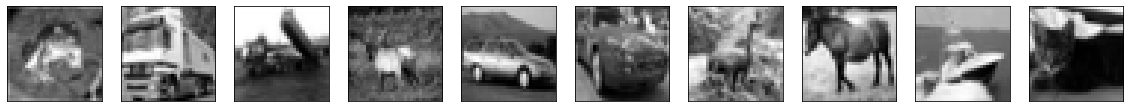

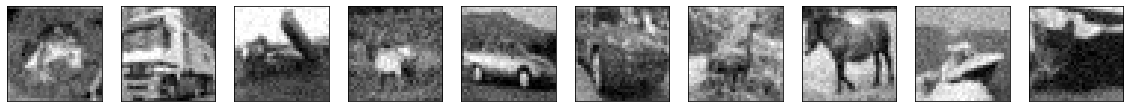

In [38]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[i,:,:,0],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train_noisy[i,:,:,0],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

We use the following autoencoder architecture. The encoder is composed of 3 conv2D/Relu/MaxPooling layers. The decoder is composed of 3 conv2D/UpSampling layers

In [39]:
autoencoder = models.Sequential()

encoding_layers = [

Conv2D(32, 3, padding='same',input_shape=(32,32,1)),
BatchNormalization() ,
Activation('relu'),
MaxPooling2D(padding='same'),
Conv2D(32, 3, padding='same'),
BatchNormalization() ,
Activation('relu'),
MaxPooling2D(padding='same'),
Conv2D(32, 3, padding='same'),
BatchNormalization() ,
Activation('relu'),
MaxPooling2D(padding='same') ]
    
decoding_layers = [
Conv2D(32, 3, padding='same'),
UpSampling2D(),
Conv2D(32, 3, padding='same'),
UpSampling2D(),
Conv2D(32, 3, padding='same'),
UpSampling2D(),
Conv2D(1, 3, activation='sigmoid', padding='same')
]

autoencoder.encoding_layers = encoding_layers
for l in autoencoder.encoding_layers:
    autoencoder.add(l)
    
autoencoder.decoding_layers = decoding_layers
for l in autoencoder.decoding_layers:
    autoencoder.add(l)

# autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x1222b3048>>

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', # go through epochs as long as accuracy on validation set increases
                                   patience=2,
                                   mode='min')
    
# save model corresponding to best epoch
checkpointer = ModelCheckpoint(filepath='model', 
                                   verbose=1, 
                                   save_best_only=True,
                                   save_weights_only=True)


autoencoder.fit(X_train_noisy[:1000], X_train[:1000], 
                epochs=50, 
                batch_size=128, 
                validation_data=(X_test_noisy[:500], X_test[:500]),
                callbacks = [early_stopping,checkpointer])

Train on 1000 samples, validate on 500 samples
Epoch 1/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.8161 - val_loss: 0.6422

Epoch 00001: val_loss improved from inf to 0.64219, saving model to model
Epoch 2/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6350 - val_loss: 0.6296

Epoch 00002: val_loss improved from 0.64219 to 0.62959, saving model to model
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6262 - val_loss: 0.6214

Epoch 00003: val_loss improved from 0.62959 to 0.62139, saving model to model
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6217 - val_loss: 0.6183

Epoch 00004: val_loss improved from 0.62139 to 0.61827, saving model to model
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6181 - val_loss: 0.6153

Epoch 00005: val_loss improved from 0.61827 to 0.61528, saving model to model
Epoch 6/50
1000/1000 [==============================

In [41]:
denoised = autoencoder.predict(X_test)

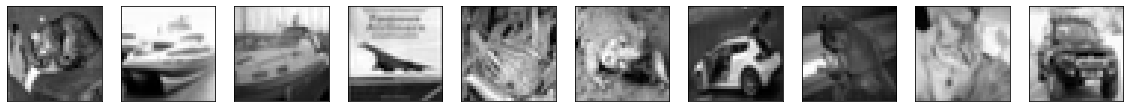

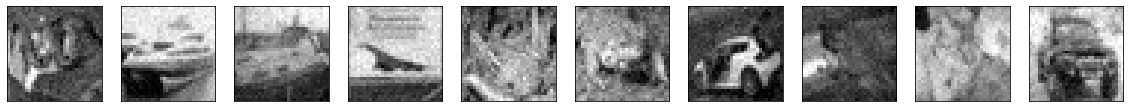

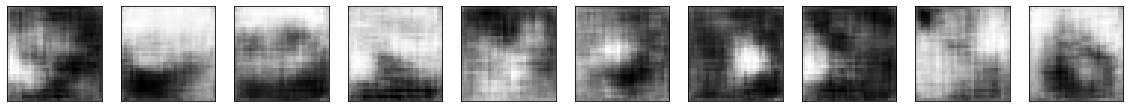

In [42]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test[i,:,:,0],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i,:,:,0],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(denoised[i,:,:,0],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

The result is not precise. The network basically only blurs the images and will be far from being competitive with state of the art denoising methods. We would need a much larger architecture to have satisdying results, but we are limited by the CPU capacities